In [82]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

med_data = pd.read_csv("expenses.csv")
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


EDA

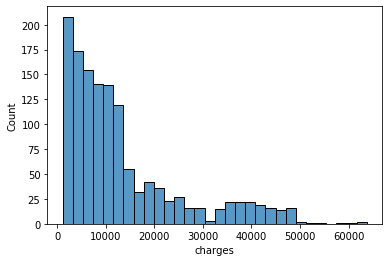

In [84]:
sns.histplot(med_data['charges'])

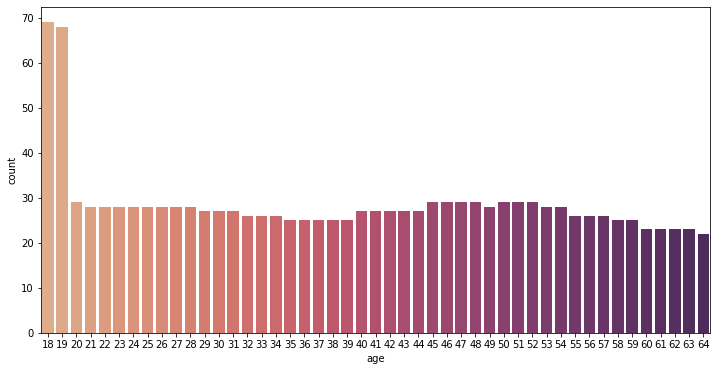

In [85]:
plt.figure(figsize=(12,6))
sns.countplot(data=med_data, x='age', palette='flare')

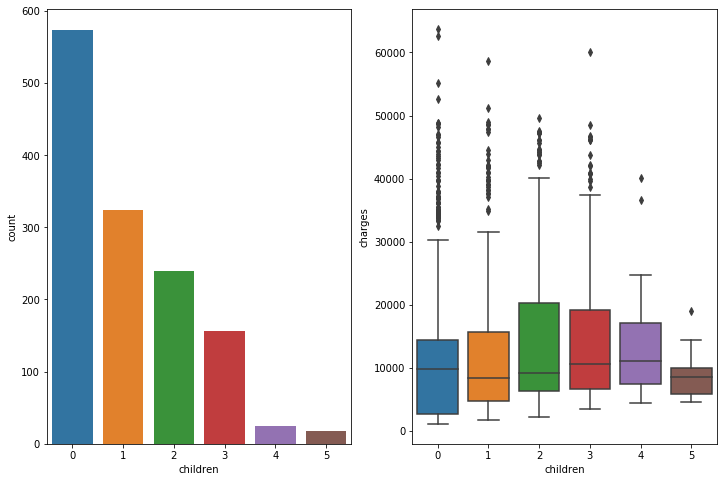

In [86]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.countplot(data=med_data, x='children')
plt.subplot(1,2,2)
sns.boxplot(data=med_data, x='children', y='charges')

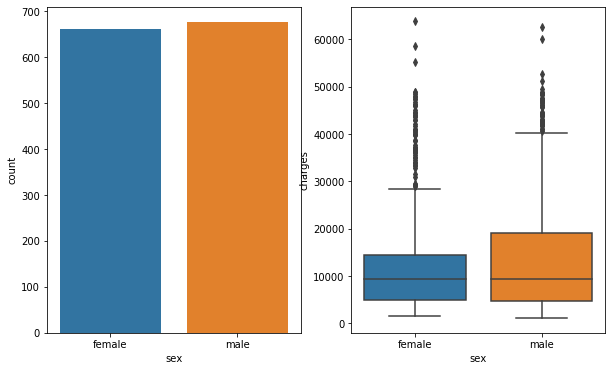

In [87]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=med_data, x='sex')
plt.subplot(1,2,2)
sns.boxplot(data=med_data, x='sex', y='charges')

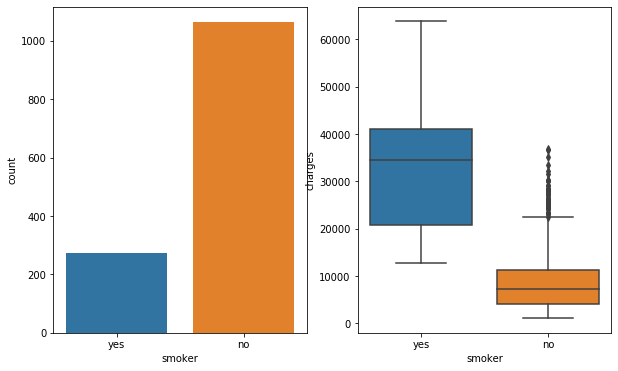

In [88]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=med_data, x='smoker')
plt.subplot(1,2,2)
sns.boxplot(data=med_data, x='smoker', y='charges')

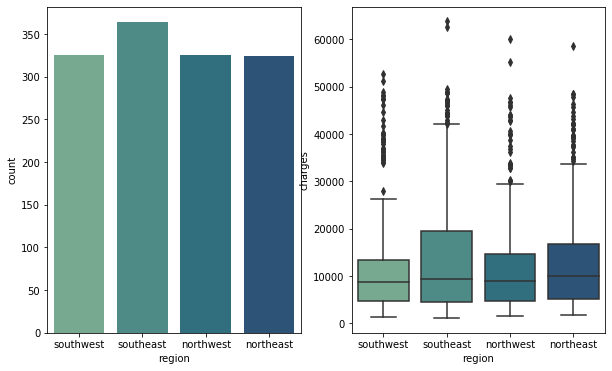

In [89]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=med_data, x='region', palette='crest')
plt.subplot(1,2,2)
sns.boxplot(data=med_data, x='region', y='charges', palette='crest')

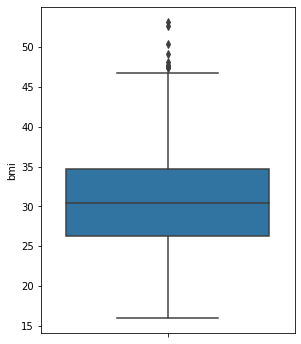

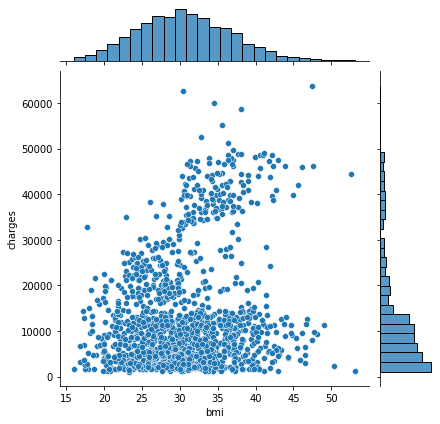

In [90]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=med_data, y='bmi')
sns.jointplot(data=med_data, x='bmi', y='charges')

Preprocessing

In [91]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [92]:
cat_columns = med_data.select_dtypes(exclude='number').columns.to_list()
scale_col = ['bmi']

y = med_data['charges']
x = med_data.drop(['charges'], axis=1)

In [93]:
# Combine the transformers into a single ColumnTransformer
preprocessing = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns),
        ('num', RobustScaler(), num_columns)
    ], remainder='passthrough', sparse_threshold=0
)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [96]:
model = Pipeline([
    ('preprocessing', preprocessing),
    ('linear_regression', LinearRegression())
])

In [98]:
# r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

In [103]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', RobustScaler(),
                                                  ['bmi'])])),
                ('linear_regression', LinearRegression())])

In [104]:
prediction = model.predict(X_test)

In [105]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true=y_test, y_pred=prediction)
print(f"The R2 score for Multivariate Regression Model is {r2:.3f}")

The R2 score for Multivariate Regression Model is 0.777
